In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Practica 1

## Estimación de π con el Método de Monte Carlo

El método de Monte Carlo es una técnica de simulación que utiliza números aleatorios para resolver problemas matemáticos. En este caso, lo utilizamos para estimar el valor de $\pi$ de la siguiente manera:

### Procedimiento:

1. **Generar puntos aleatorios**: Imaginamos un cuadrado de lado 2, y dentro de él un círculo con radio 1. El área del cuadrado es 4, y el área del círculo es $\pi r^2$ donde $r = 1$, por lo que el área del círculo es $\pi$.

2. **Definir los límites**:
   - El cuadrado tiene sus vértices en los puntos $(-1, -1)$, $(1, -1)$, $(1, 1)$, $(-1, 1)$.
   - El círculo tiene su centro en el origen $(0, 0)$ y un radio de 1.

3. **Simular puntos aleatorios**:
   - Generamos puntos aleatorios dentro del cuadrado, es decir, sus coordenadas $x$ y $y$ se generan de forma aleatoria en el rango $[-1, 1]$.

4. **Contar cuántos puntos caen dentro del círculo**:
   - Para determinar si un punto está dentro del círculo, usamos la ecuación de un círculo:
     $$
     x^2 + y^2 \leq 1
     $$

5. **Estimar $\pi$**:
   - La proporción de puntos que caen dentro del círculo con respecto al total de puntos generados debería ser aproximadamente igual al área del círculo dividida por el área del cuadrado, es decir:
     $$
     \frac{\text{Puntos dentro del círculo}}{\text{Total de puntos}} \approx \frac{\pi}{4}
     $$
   - Por lo tanto, podemos estimar $\pi$ multiplicando esta proporción por 4:
     $$
     \pi \approx 4 \times \frac{\text{Puntos dentro del círculo}}{\text{Total de puntos}}
     $$


In [2]:
def estimate_pi(num_samples, show_plot=False):
    """ Estima el valor de π usando el método de Montecarlo """
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)
    inside_circle = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_samples

    if show_plot:
        plt.figure(figsize=(6,6))
        plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label="Dentro del círculo")
        plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label="Fuera del círculo")

        circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)  # Aumentamos grosor del círculo
        plt.gca().add_patch(circle)

        # Configuración del gráfico
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_aspect('equal')
        plt.axhline(0, color='gray', linewidth=0.5)
        plt.axvline(0, color='gray', linewidth=0.5)
        plt.title(f"Estimación de π: {pi_estimate:.5f} con {num_samples} puntos")
        plt.show()

    return pi_estimate

> **Nota importante:** Este código utiliza el método de Monte Carlo para estimar el valor de $\pi$. Asegúrate de generar suficientes puntos aleatorios para obtener una aproximación precisa.

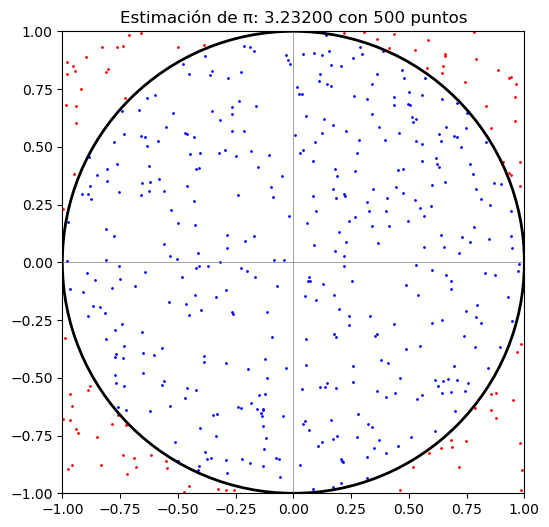

np.float64(3.232)

In [3]:
estimate_pi(500, True)

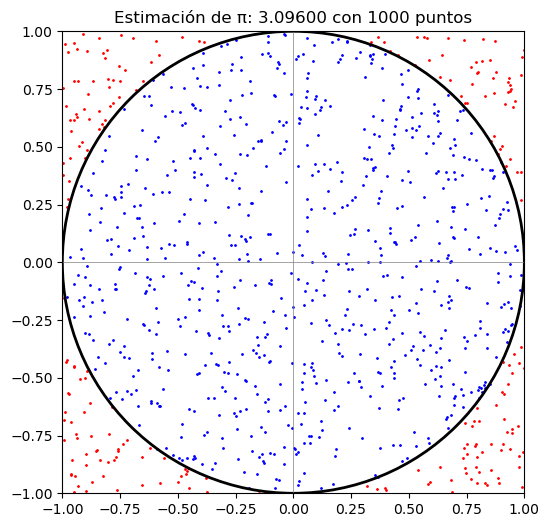

np.float64(3.096)

In [23]:
estimate_pi(1000, True)

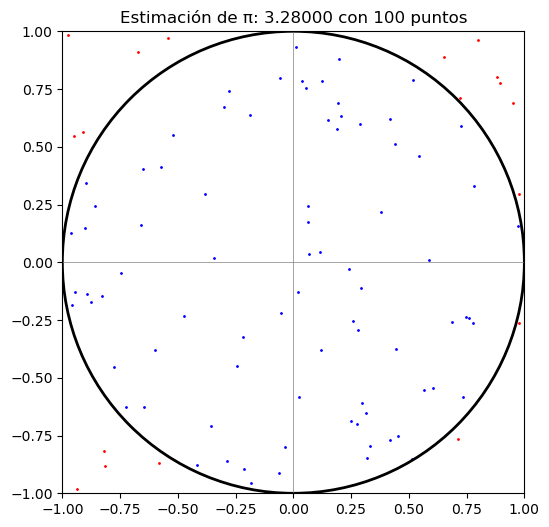

np.float64(3.28)

In [25]:
estimate_pi(100,True)

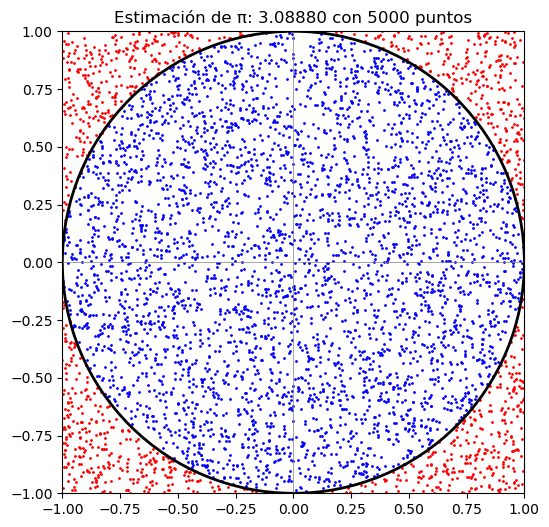

np.float64(3.0888)

In [24]:
estimate_pi(5000,True)

##  Simulación con diferentes tamaños de muestra

A continuación vamos a generar un numero de muestras con las que vamos a probar la función.

Describe los parametros y la función `np.logspace`

In [26]:
sample_sizes = np.logspace(2, 6, num=15, dtype=int)  # De 10^2 a 10^6 puntos

> **Nota importante:** La función `estimate_pi` genera un grafico si el parametro **show_plot** es True, en la definición de la función por defecto es Falso, verificar que no se use el valor *True* durante la simulación ya que estariamos generando cientos de graficos

Vamos a generar un arreglo de numpy con los valores de pi que nos retorna la función `estimate_pi` para cada valor de la lista **sample_sizes**

> **Nota importante:** El objeto `pi_estimates` debe ser un arreglo de numpy, debemos hacer la comverción ya que se definio como una lista vacia

In [27]:
pi_estimates = []
for n in sample_sizes:
    pi_estimates.append(estimate_pi(n))

pi_estimates = np.array(pi_estimates)

In [28]:
pi_estimates

array([3.04      , 3.29533679, 3.22580645, 3.1821975 , 3.11591073,
       3.20208799, 3.13342344, 3.1676    , 3.16668393, 3.12348759,
       3.14406403, 3.13289048, 3.13700055, 3.14361894, 3.14094   ])

### Cálculo de incertidumbre (desviación estándar de múltiples corridas)

In [29]:
num_trials = 100  # Repetir la estimación N veces para obtener incertidumbre


Vamos a generar un arreglo de numpy con los valores de la desviación estandar al generar N veces los valores de pi para cada tamaño valor de tamaño de muestra.
Vamos a trabajar con ciclos anidados.

> **Nota importante:** Utiliza numpy para calcular la media


> **Nota importante:** El objeto `uncertainties` debe ser un arreglo de numpy, debemos hacer la converción ya que se el objeto se definio como una lista vacia

In [30]:
uncertainties = []

for sample_size in sample_sizes:
    pi_values = []
    for _ in range(num_trials):
        pi_values.append(estimate_pi(sample_size))

    uncertainties.append(np.std(pi_values))  # Calculamos la desviación estándar con numpy

uncertainties = np.array(uncertainties)  # Convertimos la lista en un arreglo de NumPy


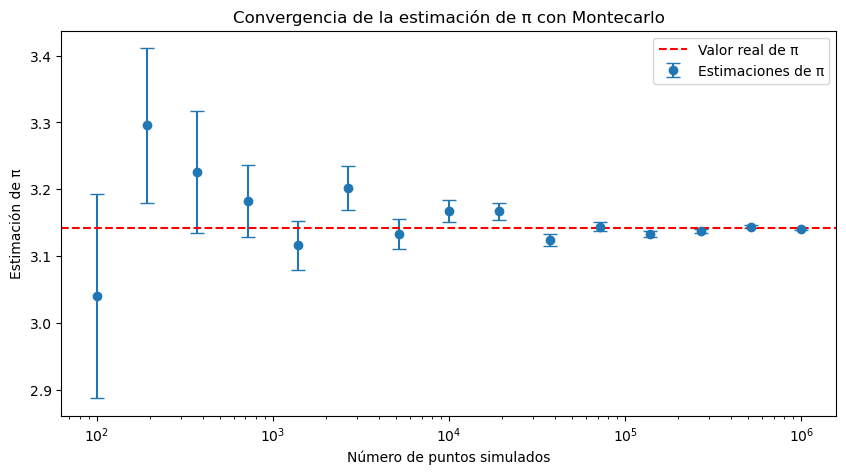

In [31]:
# Graficamos la convergencia de π y la incertidumbre
plt.figure(figsize=(10, 5))
plt.errorbar(sample_sizes, pi_estimates, yerr=uncertainties, fmt='o', capsize=5, label='Estimaciones de π')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Valor real de π')
plt.xscale("log")
plt.xlabel("Número de puntos simulados")
plt.ylabel("Estimación de π")
plt.legend()
plt.title("Convergencia de la estimación de π con Montecarlo")
plt.show()

#### Graficar los valores de incetidumbre

Utilizamos el arreglo `uncertainties` donde almacenamos los valores de la incertidumbre, para cada una de las muestras.

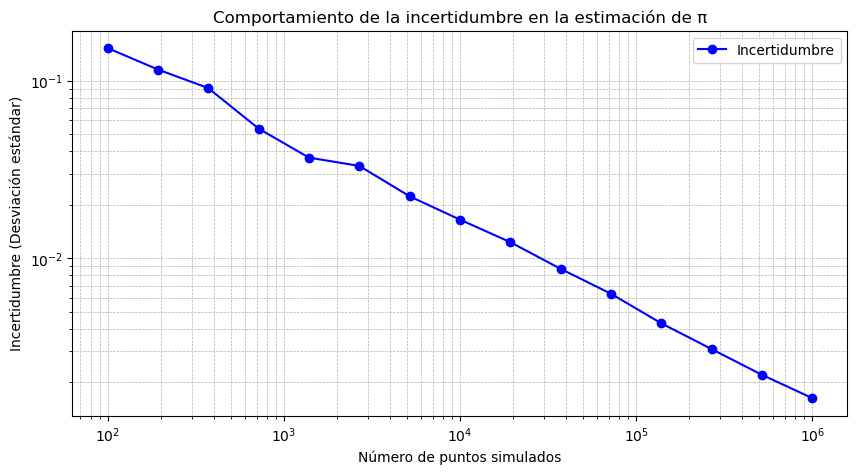

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, uncertainties, marker='o', linestyle='-', color='b', label="Incertidumbre")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Número de puntos simulados")
plt.ylabel("Incertidumbre (Desviación estándar)")
plt.title("Comportamiento de la incertidumbre en la estimación de π")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## Calculo de Error

Por cada sample_size, vamos calcular el error absoluto al estimar el valor de pi con ese tamaño de nuestra.

> **Nota importante:** Utiliza `abs()` en el calculo de el error absoluto


In [33]:
errors = []

# Calcular error absoluto en cada iteración
for n in sample_sizes:
    pi_estimate = estimate_pi(n)  # Llamamos a la función que estima π
    error = abs(pi_estimate - np.pi)  # Error absoluto con el valor real de π
    errors.append(error)


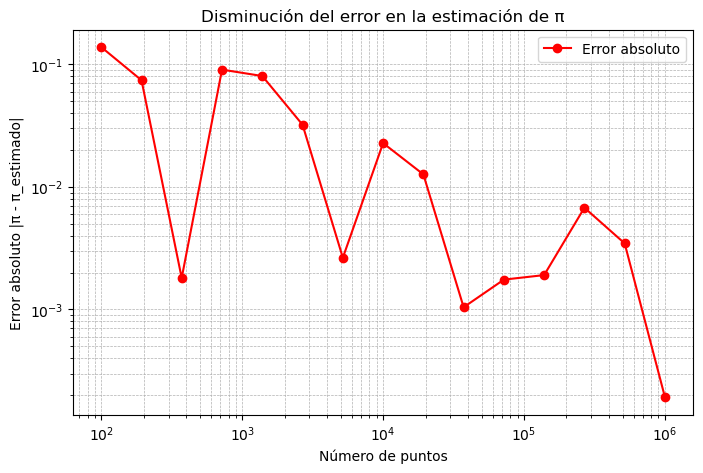

In [34]:
# Graficar el error
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, errors, marker='o', linestyle='-', color='red', label="Error absoluto")
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.yscale('log')
plt.xlabel("Número de puntos")
plt.ylabel("Error absoluto |π - π_estimado|")
plt.title("Disminución del error en la estimación de π")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

- Porque se utiliza la desviacion estandar para estimar la incertidumbre
- Que tipos de incertidumbre se pueden identificar.
- Genera un documento para el laboratorio, utilizar como guia la rubrica.